In [1]:
from PIL import Image
from inference.util import draw_bb_on_img
from inference.constants import MODEL_PATH
from face_recognition import preprocessing
from inference.classifier import recognise_faces
import joblib

In [2]:
def unlock(img_path):
    preprocess = preprocessing.ExifOrientationNormalize()
    img = Image.open(img_path)
    filename = img.filename
    img = preprocess(img)
    img = img.convert('RGB')

    faces = joblib.load('/media/jeason/Data/git/face-recognition/model/face_recogniser.pkl')(img)

    print(faces[0][0][0])
    if faces[0][0][0] == 'Person Not Recognized':
        print(f'Cannot unlock the door. You are not a recognized person. Please leave!')
    else:
        print(f'Welocme Home: {faces[0][0][0]}')




In [3]:
unlock('/media/jeason/Data/git/face-recognition/test_images/rudd.png')

{0: 'biden', 1: 'elon', 2: 'jr', 3: 'mj', 4: 'obama', 5: 'sr', 6: 'trump', 7: 'zuk'}
[0.02949578 0.15501384 0.35461832 0.03906132 0.05734389 0.31830264
 0.01834574 0.02781847]
2
Person Not Recognized
Cannot unlock the door. You are not a recognized person. Please leave!


In [4]:
unlock('/media/jeason/Data/git/face-recognition/test_images/obama.png')

{0: 'biden', 1: 'elon', 2: 'jr', 3: 'mj', 4: 'obama', 5: 'sr', 6: 'trump', 7: 'zuk'}
[0.1610081  0.15955244 0.06878085 0.01879491 0.3531092  0.03663402
 0.08802818 0.1140923 ]
4
Person Not Recognized
Cannot unlock the door. You are not a recognized person. Please leave!


## Data Augmentation

In [9]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform

2022-09-11 11:23:11.589683: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-11 11:23:11.769413: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-11 11:23:11.769429: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-11 11:23:11.787039: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-11 11:23:12.309545: W tensorflow/stream_executor/platform/de

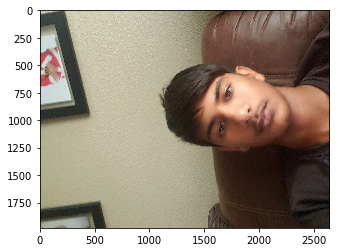

In [13]:
image = image.imread("/media/jeason/Data/git/face-recognition/images/naithruv/naithruv_1.jpg")
plt.imshow(image)

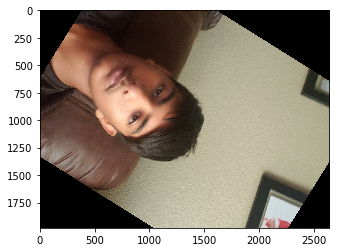

In [14]:
t_img = transform.rotate(image,
                         angle=148,
                         cval=0)

plt.imshow(t_img)

In [7]:
image

array([[[204, 203, 172],
        [206, 205, 175],
        [215, 211, 184],
        ...,
        [ 84,  65,  58],
        [ 83,  64,  57],
        [ 85,  66,  59]],

       [[203, 202, 172],
        [207, 203, 174],
        [213, 209, 182],
        ...,
        [ 84,  65,  58],
        [ 79,  60,  53],
        [ 79,  60,  53]],

       [[210, 206, 177],
        [210, 206, 179],
        [212, 206, 182],
        ...,
        [ 84,  65,  58],
        [ 79,  60,  53],
        [ 80,  61,  54]],

       ...,

       [[159, 156, 137],
        [155, 154, 134],
        [157, 156, 136],
        ...,
        [ 43,  38,  34],
        [ 37,  32,  28],
        [ 41,  36,  32]],

       [[161, 158, 139],
        [158, 157, 137],
        [158, 157, 136],
        ...,
        [ 39,  34,  30],
        [ 36,  31,  27],
        [ 43,  38,  34]],

       [[161, 158, 139],
        [158, 157, 137],
        [156, 155, 135],
        ...,
        [ 38,  33,  29],
        [ 34,  29,  25],
        [ 43,  38,  34]]